**Importing the libraries**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**Importing the dataset**

In [40]:
df = pd.read_csv('trainKNN.csv')

In [41]:
df.head() 

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('column_k',axis=1))
Scaled = scaler.transform(df.drop('column_k',axis=1))

In [43]:
scaledview = pd.DataFrame(Scaled,columns=df.columns[:-1])
scaledview.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


**Splitting the dataset into the Training set and Test set**

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(Scaled,df['column_k'],
                                                    test_size=0.30)

In [46]:
import math
print(math .sqrt(len(y_train)))
print(len(y_train))

12.206555615733702
149


**Fitting K-NN to the Training set**

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

**Predicting the Test set results**

In [48]:
y_pre = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       0.91      0.95      0.93        22
           2       0.77      0.88      0.82        26
           3       0.00      0.00      0.00         3
           5       0.33      0.33      0.33         3
           6       1.00      0.33      0.50         3
           7       0.86      0.75      0.80         8

    accuracy                           0.80        65
   macro avg       0.65      0.54      0.56        65
weighted avg       0.78      0.80      0.78        65



**Making the Confusion Matrix**

In [49]:
confusion_matrix(y_test,y_pre)

array([[21,  1,  0,  0,  0,  0],
       [ 1, 23,  0,  2,  0,  0],
       [ 1,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  1,  1],
       [ 0,  2,  0,  0,  0,  6]])

In [50]:
accuracy_score(y_test, y_pre)

0.8

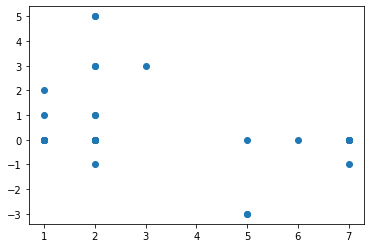

In [51]:
residuals = y_test - y_pre
residuals.mean()
plt.scatter(y_pre, residuals)

In [52]:
error_rate = []


for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

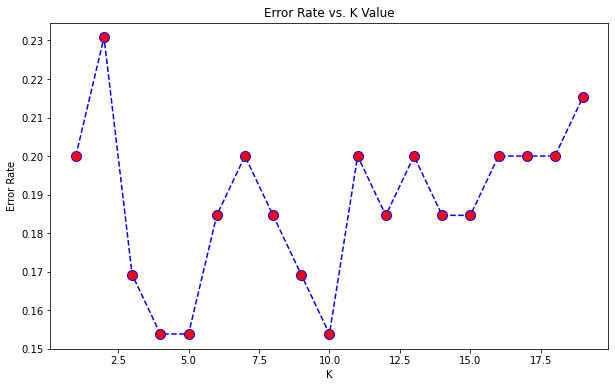

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')